In [1]:
import Ab as ab
import datetime as dt
import pandas as pd
sd = dt.datetime(2002,1,1)
ed = dt.datetime(2023,3,14)
# 1x leveraged nasdaq 100 etf
qqq = ab.StockData('QQQ')
qqq.get_data_from_yfinance('QQQ',sd,ed+dt.timedelta(days=1))

qld = ab.StockData('QLD')
qld.get_data_from_yfinance('QLD',sd,ed+dt.timedelta(days=1))

tqqq = ab.StockData('TQQQ')
tqqq.get_data_from_yfinance('TQQQ',sd,ed+dt.timedelta(days=1))

spy = ab.StockData('SPY')
spy.get_data_from_yfinance('SPY',sd,ed+dt.timedelta(days=1))

ticker = tqqq

naa200r = ab.StockData('NAA200R')
naa200r.get_data_from_csv('data/NAA200R.csv')

ndxa200r = ab.StockData('NDXA200R')
ndxa200r.get_data_from_csv('data/NDXA200R.csv')


spxa200r = ab.StockData('SPXA200R')
spxa200r.get_data_from_csv('data/SPXA200R.csv')
indicator = naa200r



GPU acceleration is available
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [2]:
test_start = dt.datetime(2010,4,21)
test_end = dt.datetime(2017,4,21)


In [3]:
#buy and hold
import time
bah = ab.BuyAndHold(ticker)
#time the execution of the strategy
start_time = time.time()
bah.run_strategy(ticker,test_start,test_end)
print("--- %s seconds ---" % (time.time() - start_time))
bah.trades

--- 0.0006651878356933594 seconds ---


,Date,Signal
0,2010-04-21,1
1,2017-04-21,-1


In [4]:

bah_bt = ab.BackTest()
start_time = time.time()
bah_bt.run_backtest(bah,ticker,test_start,test_end)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.5551884174346924 seconds ---



<Ab.StockData object at 0x7fd20e9b64d0>: 
cumulative return      : 1036.90%
compound anual return  : 26.3495% 
max_drawdown           : -44.54%
sharp_ratio            : 5.94%
average of daily return: 0.1889%
std of daily return    : 3.1822%
number of trades       : 2,
trading days           : 2557,
Betting Average        : 100.00%
Gain Average           : 1036.90%
Loss Average           : nan%
Risk Reward Ratio      : nan
Gain STD               : nan%
Loss STD               : nan%
        


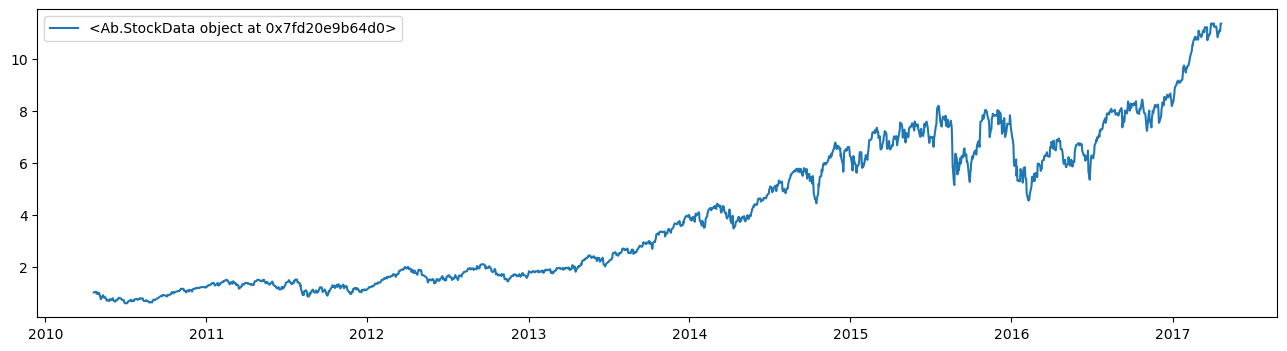

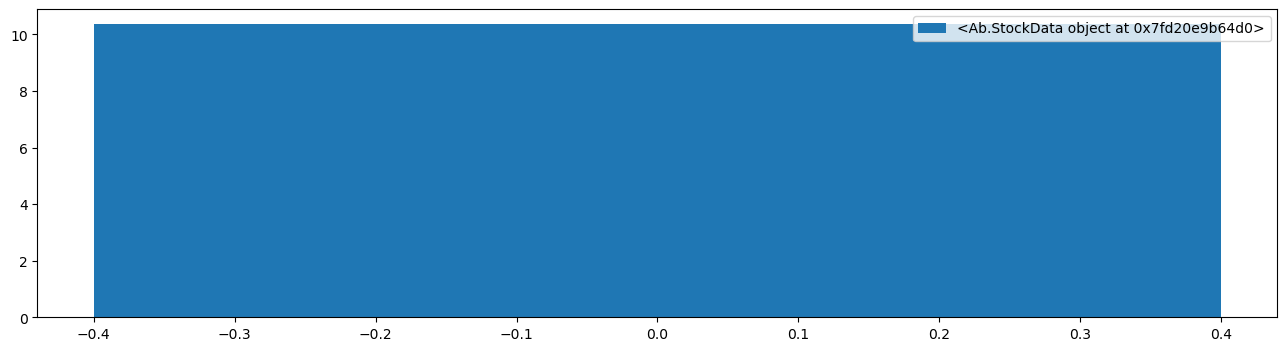

In [5]:

bah_bt.plot_balance()
bah_bt.plot_records()
bah_bt.performance_summary()

In [6]:
bah_bt.trade_records

,Buy Date,Sell Date,Ticker,Quant,Buy Price,Sell Price,Profit,Profit %
0,2010-04-21,2017-04-21 00:00:00,TQQQ,1.544526,0.647448,7.360833,10.368995,10.368995


In [7]:
stg = ab.Threshold('NAA200R')
stg.run_strategy(naa200r, start_date=test_start, end_date=test_end)

#stg = ab.MAThreshold('NAA200R',21, 1,1)
#stg.run_strategy(naa200r, test_start, test_end)

#stg = ab.MACross('MaCross',50,200)
#stg.run_strategy(naa200r, test_start, test_end)


In [8]:
stg.trades.loc[stg.trades['Signal'] !=0]

,Date,Signal
0,2010-04-21,1.0
1,2010-04-22,1.0
2,2010-04-23,1.0
3,2010-04-26,1.0
4,2010-04-27,1.0
...,...,...
1750,2017-04-03,1.0
1751,2017-04-04,1.0
1756,2017-04-11,1.0
1762,2017-04-20,1.0


In [9]:
naa200r_bt_weekly = ab.BackTest()
naa200r_bt_weekly.run_backtest(stg, ticker,test_start,test_end, True,True)



NAA200R 15/30 MA 20: 
cumulative return      : 593.75%
compound anual return  : 19.4980% 
max_drawdown           : -52.41%
sharp_ratio            : 5.28%
average of daily return: 0.1509%
std of daily return    : 2.8568%
number of trades       : 8,
trading days           : 2557,
Betting Average        : 57.14%
Gain Average           : 112.60%
Loss Average           : -12.21%
Risk Reward Ratio      : 9.22
Gain STD               : 149.57%
Loss STD               : 3.59%
        


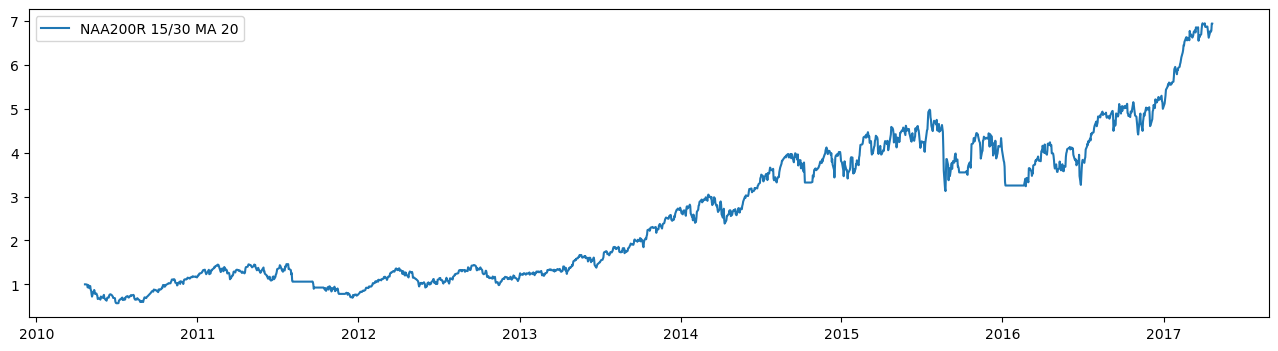

In [10]:
import matplotlib.pyplot as plt
naa200r_bt_weekly.plot_balance()
naa200r_bt_weekly.performance_summary()

plt.savefig('data/{}_naa200r_bt_weekly_{}-{}.png'.format(ticker.ticker,ticker.start_date.date(),ticker.end_date.date()))
naa200r_bt_weekly.trade_records.to_csv('data/{}_naa200r_bt_weekly_{}-{}.csv'.format(ticker.ticker,ticker.start_date.date(),ticker.end_date.date()))




,Buy Date,Sell Date,Ticker,Quant,Buy Price,Sell Price,Profit,Profit %
0,2010-04-23,2011-08-05 00:00:00,TQQQ,1.502113,0.665729,0.706771,0.061650,0.061650
1,2011-09-16,2011-09-23 00:00:00,TQQQ,1.366014,0.777188,0.678646,-0.134610,-0.126793
2,2011-10-14,2011-11-18 00:00:00,TQQQ,1.119445,0.828125,0.699375,-0.144129,-0.155472
3,2011-12-02,2014-10-10 00:00:00,TQQQ,1.061725,0.737396,3.125417,2.535421,3.238451
4,2014-10-24,2015-09-25 00:00:00,TQQQ,0.937603,3.539167,3.785000,0.230494,0.069461
5,2015-10-09,2016-01-08 00:00:00,TQQQ,0.853596,4.157500,3.807917,-0.298402,-0.084085
6,2016-02-19,2017-04-21 00:00:00,TQQQ,0.942493,3.448750,7.360833,0.000000,1.134348


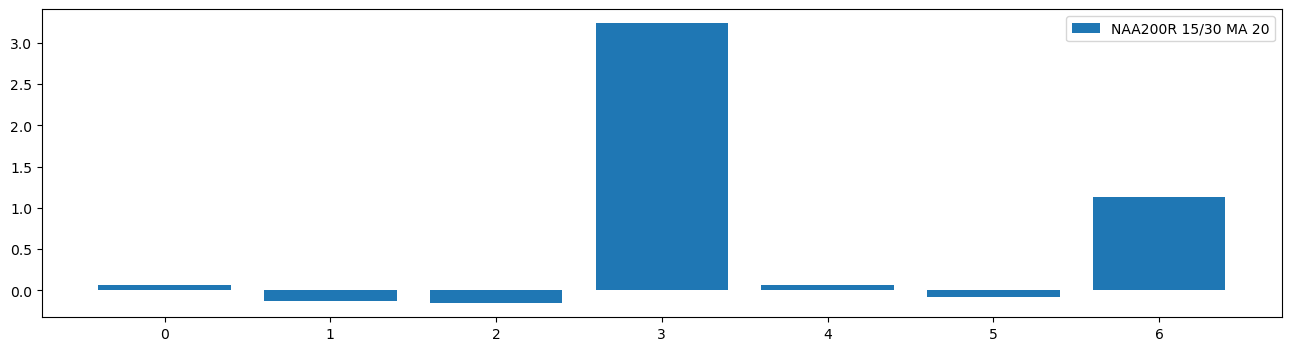

In [11]:
naa200r_bt_weekly.plot_records()
naa200r_bt_weekly.trade_records

In [16]:
naa200r_bt_daily = ab.BackTest()
naa200r_bt_daily.run_backtest(stg, ticker, test_start,test_end)


In [13]:
#set print limit for dataframe
pd.set_option('display.max_rows', 10000)
print(naa200r_bt_daily.balance)

           Date      Cash     Stock     Total  Margin
0    2010-04-21  0.000000  1.544526  1.000000       0
1    2010-04-22  0.000000  1.544526  1.014801       0
2    2010-04-23  0.000000  1.544526  1.028235       0
3    2010-04-26  0.000000  1.544526  1.020593       0
4    2010-04-27  0.000000  1.544526  0.957606       0
5    2010-04-28  0.000000  1.544526  0.959858       0
6    2010-04-29  0.000000  1.544526  1.008849       0
7    2010-04-30  0.000000  1.544526  0.949401       0
8    2010-05-03  0.000000  1.544526  0.988175       0
9    2010-05-04  0.000000  1.544526  0.900812       0
10   2010-05-05  0.000000  1.544526  0.886011       0
11   2010-05-06  0.000000  1.544526  0.799212       0
12   2010-05-07  0.000000  1.544526  0.741051       0
13   2010-05-10  0.000000  1.544526  0.851580       0
14   2010-05-11  0.000000  1.544526  0.851018       0
15   2010-05-12  0.000000  1.544526  0.896870       0
16   2010-05-13  0.000000  1.544526  0.856327       0
17   2010-05-14  0.000000  1


NAA200R 15/30 MA 20: 
cumulative return      : 830.42%
compound anual return  : 23.5748% 
max_drawdown           : -43.09%
sharp_ratio            : 5.96%
average of daily return: 0.1652%
std of daily return    : 2.7699%
number of trades       : 16,
trading days           : 2557,
Betting Average        : 46.67%
Gain Average           : 82.91%
Loss Average           : -9.30%
Risk Reward Ratio      : 8.91
Gain STD               : 134.76%
Loss STD               : 10.32%
        


<Figure size 640x480 with 0 Axes>

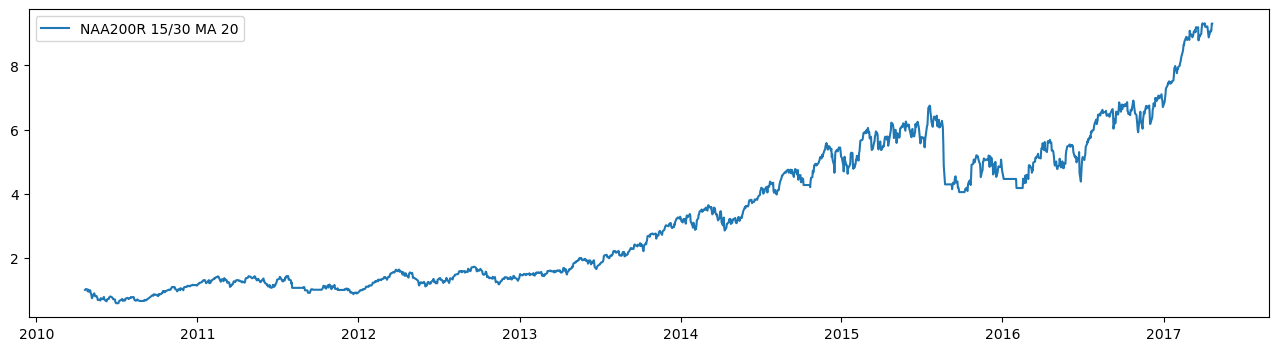

In [14]:
import matplotlib.pyplot as plt
plt.savefig('data/{}_naa200r_bt_daily_{}-{}.png'.format(ticker.ticker,ticker.start_date.date(),ticker.end_date.date()))
naa200r_bt_daily.trade_records.to_csv('data/{}_naa200r_15-30-MA20-daily_{}-{}.csv'.format(ticker.ticker,ticker.start_date.date(),ticker.end_date.date()))
naa200r_bt_daily.performance_summary()
naa200r_bt_daily.plot_balance()

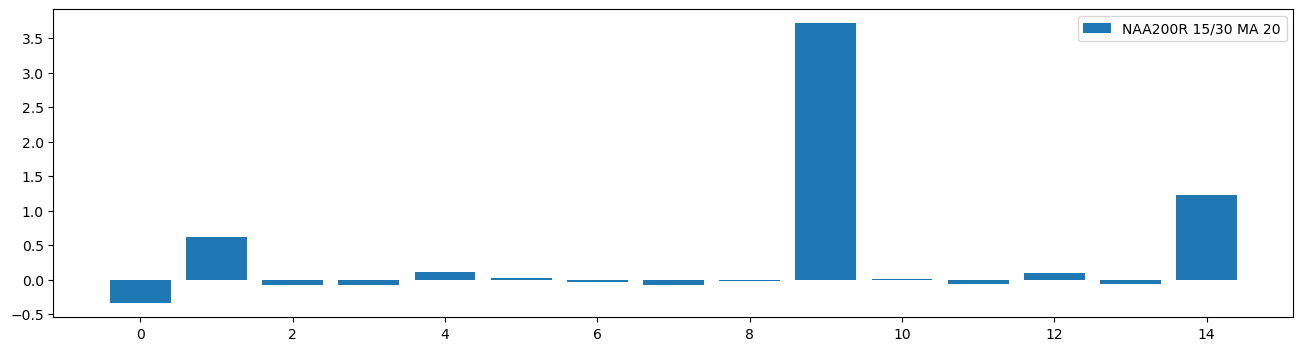

In [15]:
naa200r_bt_daily.plot_records()